<h1>Prediction of Dental Caries Using Machine Learning In Personalized Medecine_CNN</h1>

<h2>Importing Packages</h2>

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
import imblearn
print(imblearn.__version__)

0.8.0


In [5]:
df = pd.read_excel('Oral_health_care_dataset.xlsx').copy()
df.head(10)

,act_caries_p,Sido_No,Region_No,Gender,prev_caries_p,X1,X2,X3,X4_1,X4_2,...,X14_6,X14_7,X14_8,X14_9,x15_1,X16,act_caries_p.1,Calculus,Bleeding,Fluorosis
0,0,14,1,2,1,2,1,2,1,0,...,0,0,0,0,1,3,0,0,0,0
1,0,12,1,2,1,3,1,1,1,0,...,0,0,0,0,3,3,0,0,0,0
2,1,11,1,1,0,4,1,2,0,0,...,0,1,0,0,2,2,1,0,0,0
3,0,25,2,2,1,4,1,2,1,0,...,0,1,0,0,2,1,0,0,0,0
4,0,26,2,1,1,3,1,2,1,0,...,0,1,0,0,1,3,0,0,0,0
5,1,22,2,1,1,3,1,2,1,0,...,0,0,1,0,1,7,1,0,0,1
6,0,10,1,2,1,3,1,2,0,0,...,0,0,1,0,2,6,0,0,0,0
7,1,20,2,1,1,3,1,2,0,0,...,0,0,0,0,2,2,0,0,0,1
8,0,10,1,2,0,4,1,1,1,0,...,0,0,1,0,2,1,0,1,0,0
9,0,26,2,1,1,4,1,2,0,0,...,0,1,1,0,2,6,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22288 entries, 0 to 22287
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   act_caries_p    22288 non-null  int64
 1   Sido_No         22288 non-null  int64
 2   Region_No       22288 non-null  int64
 3   Gender          22288 non-null  int64
 4   prev_caries_p   22288 non-null  int64
 5   X1              22288 non-null  int64
 6   X2              22288 non-null  int64
 7   X3              22288 non-null  int64
 8   X4_1            22288 non-null  int64
 9   X4_2            22288 non-null  int64
 10  X4_3            22288 non-null  int64
 11  X4_4            22288 non-null  int64
 12  X4_5            22288 non-null  int64
 13  X4_6            22288 non-null  int64
 14  X4_7            22288 non-null  int64
 15  X4_8            22288 non-null  int64
 16  X4_9            22288 non-null  int64
 17  X5_1            22288 non-null  int64
 18  X5_2            22288 non-

In [7]:
df['act_caries_p'].value_counts()

0    20593
1     1695
Name: act_caries_p, dtype: int64

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# transform the dataset

df_new = df
df_new.shape

df_cut_cor=df_new.drop('act_caries_p',axis=1)
df_cut_cor=df_cut_cor.drop('Region_No',axis=1)
df_scaled = df_cut_cor.copy()

Y = df_new['act_caries_p']
X = df_scaled

over = SMOTE(sampling_strategy=0.7)

X, Y = over.fit_resample(X, Y)

In [10]:
from collections import Counter

# summarize the new class distribution
counter = Counter(Y)
print(counter)

Counter({0: 20593, 1: 14415})


In [11]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
# Define the scaler 
scaler = StandardScaler().fit(X)
# Scale the train set
X = scaler.transform(X)
# Define the scaler 
#scaler = StandardScaler().fit(X_train)

In [12]:
from sklearn.model_selection import train_test_split
# importing library for LSTM layers
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv1D,MaxPooling1D


opt = tf.keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-7,amsgrad=False)
#X = df.iloc[:,1:]
#Y = df[['act_caries_p']].values

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)

#convert the data to numpy arrays
X_train = np.array(X_train)
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

model = Sequential()
model.add(Conv1D(27,kernel_size=2,activation='relu',input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(54,3,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(54,3,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(54,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

# Fitting the RNN to the Training set
#regressor.fit(x_train, y_train, epochs = 200,batch_size=1000 ,validation_split=0.2)

es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(x_train,
                    y_train,
                    callbacks=[es],
                    epochs=200, # you can set this to a big number!
                    batch_size=1380,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

/home/soualihou/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
17/17 [==============================] - 1s 52ms/step - loss: 0.6388 - accuracy: 0.5912 - val_loss: 0.5691 - val_accuracy: 0.7353
Epoch 2/200
17/17 [==============================] - 1s 36ms/step - loss: 0.5198 - accuracy: 0.7645 - val_loss: 0.4737 - val_accuracy: 0.8029
Epoch 3/200
17/17 [==============================] - 1s 35ms/step - loss: 0.4691 - accuracy: 0.7969 - val_loss: 0.4364 - val_accuracy: 0.8167
Epoch 4/200
17/17 [==============================] - 1s 35ms/step - loss: 0.4472 - accuracy: 0.8051 - val_loss: 0.4228 - val_accuracy: 0.8211
Epoch 5/200
17/17 [==============================] - 1s 34ms/step - loss: 0.4373 - accuracy: 0.8089 - val_loss: 0.4185 - val_accuracy: 0.8242
Epoch 6/200
17/17 [==============================] - 1s 35ms/step - loss: 0.4326 - accuracy: 0.8130 - val_loss: 0.4136 - val_accuracy: 0.8213
Epoch 7/200
17/17 [==============================] - 1s 35ms/step - loss: 0.4288 - accuracy: 0.8149 - val_loss: 0.4126 - val_accuracy: 0.8249
Epoch 

17/17 [==============================] - 1s 34ms/step - loss: 0.3768 - accuracy: 0.8418 - val_loss: 0.3763 - val_accuracy: 0.8418
Epoch 59/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3773 - accuracy: 0.8395 - val_loss: 0.3739 - val_accuracy: 0.8476
Epoch 60/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3770 - accuracy: 0.8410 - val_loss: 0.3743 - val_accuracy: 0.8481
Epoch 61/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3749 - accuracy: 0.8428 - val_loss: 0.3729 - val_accuracy: 0.8481
Epoch 62/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3760 - accuracy: 0.8416 - val_loss: 0.3754 - val_accuracy: 0.8449
Epoch 63/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3759 - accuracy: 0.8413 - val_loss: 0.3736 - val_accuracy: 0.8463
Epoch 64/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3778 - accuracy: 0.8426 - val_loss: 0.3750 - val_accuracy: 0.8486
Epoch 65/200

17/17 [==============================] - 1s 34ms/step - loss: 0.3463 - accuracy: 0.8562 - val_loss: 0.3594 - val_accuracy: 0.8551
Epoch 116/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3438 - accuracy: 0.8569 - val_loss: 0.3602 - val_accuracy: 0.8577
Epoch 117/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3422 - accuracy: 0.8595 - val_loss: 0.3609 - val_accuracy: 0.8534
Epoch 118/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3425 - accuracy: 0.8578 - val_loss: 0.3601 - val_accuracy: 0.8545
Epoch 119/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3438 - accuracy: 0.8587 - val_loss: 0.3575 - val_accuracy: 0.8576
Epoch 120/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3421 - accuracy: 0.8607 - val_loss: 0.3591 - val_accuracy: 0.8563
Epoch 121/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3429 - accuracy: 0.8582 - val_loss: 0.3596 - val_accuracy: 0.8543
Epoch 

Epoch 172/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3145 - accuracy: 0.8700 - val_loss: 0.3454 - val_accuracy: 0.8686
Epoch 173/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3100 - accuracy: 0.8740 - val_loss: 0.3443 - val_accuracy: 0.8654
Epoch 174/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3099 - accuracy: 0.8756 - val_loss: 0.3453 - val_accuracy: 0.8661
Epoch 175/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3092 - accuracy: 0.8732 - val_loss: 0.3442 - val_accuracy: 0.8658
Epoch 176/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3124 - accuracy: 0.8757 - val_loss: 0.3441 - val_accuracy: 0.8670
Epoch 177/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3067 - accuracy: 0.8736 - val_loss: 0.3454 - val_accuracy: 0.8670
Epoch 178/200
17/17 [==============================] - 1s 34ms/step - loss: 0.3109 - accuracy: 0.8721 - val_loss: 0.3430 - val_accuracy:

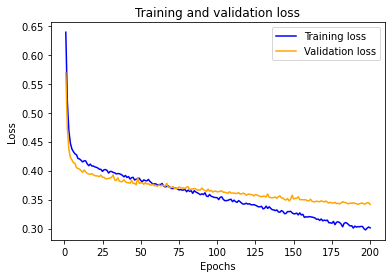

In [13]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

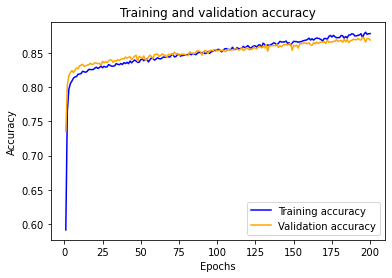

0.872902512550354

In [16]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'blue', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_test = np.array(X_test)
x_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# see how these are numbers between 0 and 1? 
model.predict(x_test) # prob of successes (survival)
np.round(model.predict(x_test),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or X_test_fs)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(x_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y_test, preds))

[[3743  408]
 [ 480 2371]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4151
           1       0.85      0.83      0.84      2851

    accuracy                           0.87      7002
   macro avg       0.87      0.87      0.87      7002
weighted avg       0.87      0.87      0.87      7002

